<a href="https://colab.research.google.com/github/2303A52058/Generative-AI/blob/main/Gen_AI_A7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

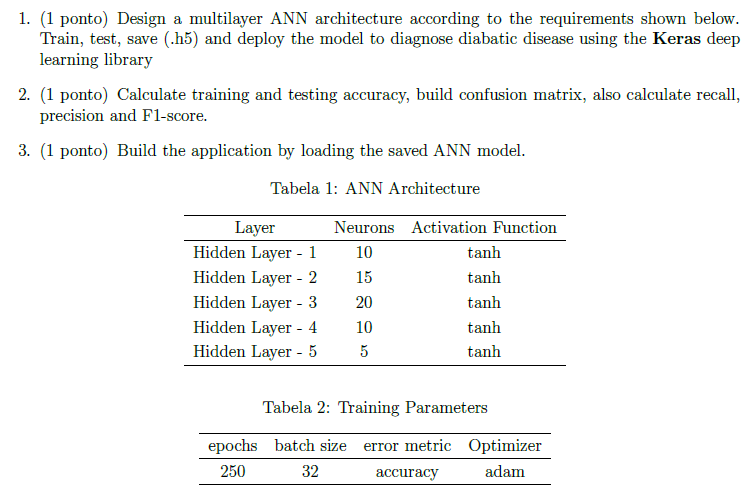

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load dataset
df = pd.read_csv("diabetes.csv")

# Separate features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build ANN model
model = Sequential([
    Dense(10, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(15, activation='tanh'),
    Dense(20, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(5, activation='tanh'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
y_pred_train = (model.predict(X_train) > 0.5).astype(int)
y_pred_test = (model.predict(X_test) > 0.5).astype(int)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

print(f"Training Accuracy: {train_acc}")
print(f"Testing Accuracy: {test_acc}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Save model
model.save("diabetes_model.h5")

# Load and deploy model
def predict_diabetes(input_data):
    loaded_model = load_model("diabetes_model.h5")
    input_scaled = scaler.transform(np.array(input_data).reshape(1, -1))
    prediction = loaded_model.predict(input_scaled)
    return int(prediction[0][0] > 0.5)  # Return 0 or 1

# Example usage
example_input = X_test[0].reshape(1, -1)
predicted_class = predict_diabetes(example_input)
print(f"Predicted Diabetes Outcome: {predicted_class}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6992 - loss: 0.5880 - val_accuracy: 0.7013 - val_loss: 0.5812
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7298 - loss: 0.5373 - val_accuracy: 0.7143 - val_loss: 0.5412
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7589 - loss: 0.5103 - val_accuracy: 0.7403 - val_loss: 0.5161
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7562 - loss: 0.5052 - val_accuracy: 0.7403 - val_loss: 0.5049
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7485 - loss: 0.5069 - val_accuracy: 0.7273 - val_loss: 0.5007
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7603 - loss: 0.4868 - val_accuracy: 0.7273 - val_loss: 0.4963
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7673 - loss: 0.4633 - val_accuracy: 0.7468 - val_loss: 0.4981
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7343 - loss: 0.5112 - val_accuracy: 0.7403 - 

Training Accuracy: 0.9381107491856677
Testing Accuracy: 0.6363636363636364
Confusion Matrix:
 [[70 29]
 [27 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71        99
           1       0.49      0.51      0.50        55

    accuracy                           0.64       154
   macro avg       0.61      0.61      0.61       154
weighted avg       0.64      0.64      0.64       154



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Diabetes Outcome: 0
